<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(ResNet)_Pepper_Plant_Village_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import ResNet50

In [8]:
# Define classes
classes = ["Pepper__bell___Bacterial_spot", "Pepper__bell___healthy"]

In [9]:
# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Pepper"

In [10]:

# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

In [11]:
# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),  # Resizing images to 32x32 to match the input shape of ResNet50
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

Found 1989 images belonging to 2 classes.


In [12]:
# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)

Found 496 images belonging to 2 classes.


In [13]:
# Load the ResNet50 model without the top classification layer and with pretrained weights on ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [14]:
# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

In [15]:
# Define your custom classification layers without dropout
x = layers.Flatten()(resnet.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes

In [16]:
# Create the model
resnet_model = models.Model(resnet.input, output)

In [17]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Fit the model
history = resnet_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
63/63 [==============================] - 37s 497ms/step - loss: 0.4963 - accuracy: 0.7989 - val_loss: 0.3434 - val_accuracy: 0.8589
Epoch 2/20
63/63 [==============================] - 38s 598ms/step - loss: 0.3272 - accuracy: 0.8638 - val_loss: 0.3083 - val_accuracy: 0.8710
Epoch 3/20
63/63 [==============================] - 29s 460ms/step - loss: 0.2626 - accuracy: 0.9020 - val_loss: 0.3041 - val_accuracy: 0.8810
Epoch 4/20
63/63 [==============================] - 23s 362ms/step - loss: 0.2275 - accuracy: 0.9050 - val_loss: 0.2686 - val_accuracy: 0.8972
Epoch 5/20
63/63 [==============================] - 37s 583ms/step - loss: 0.3104 - accuracy: 0.8743 - val_loss: 0.2879 - val_accuracy: 0.8871
Epoch 6/20
63/63 [==============================] - 24s 377ms/step - loss: 0.2310 - accuracy: 0.9070 - val_loss: 0.3536 - val_accuracy: 0.8730
Epoch 7/20
63/63 [==============================] - 28s 448ms/step - loss: 0.2332 - accuracy: 0.9085 - val_loss: 0.2553 - val_accuracy: 0.8831

In [20]:
# Evaluate the model
test_loss, test_accuracy = resnet_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 5s 276ms/step - loss: 0.2474 - accuracy: 0.9052
Test Accuracy: 0.9052419066429138


In [21]:
# Get the predicted classes for the test data
y_pred = np.argmax(resnet_model.predict(test_generator), axis=1)

16/16 [==============================] - 6s 246ms/step


In [22]:
# Get true labels
y_true = test_generator.classes

In [23]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

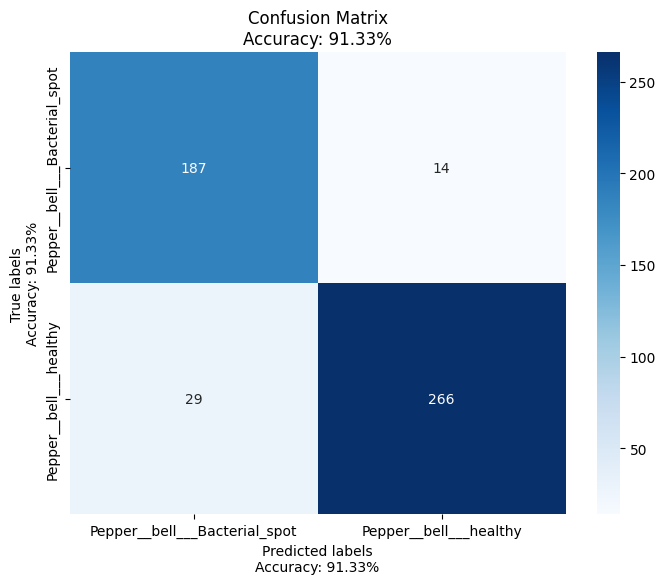

In [24]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

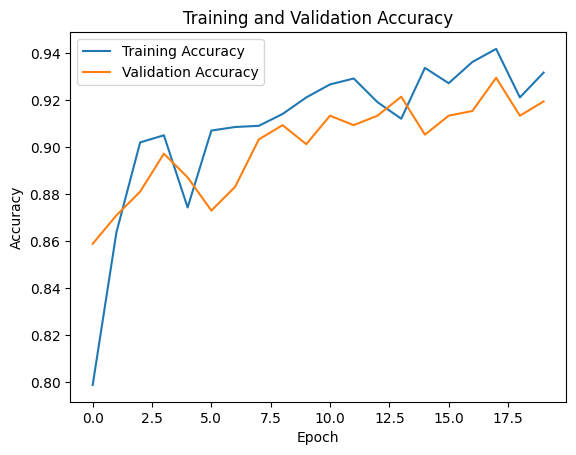

In [25]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

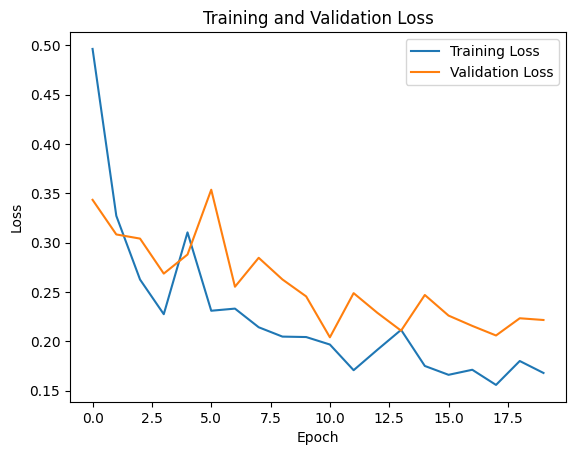

In [26]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [27]:
# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)

Predicted class name: Pepper__bell___Bacterial_spot


Found 1989 images belonging to 2 classes.
Found 496 images belonging to 2 classes.
Epoch 1/10
63/63 [==============================] - 28s 391ms/step - loss: 0.7753 - accuracy: 0.7506 - val_loss: 0.3613 - val_accuracy: 0.8347
Epoch 2/10
63/63 [==============================] - 22s 340ms/step - loss: 0.3353 - accuracy: 0.8607 - val_loss: 0.3273 - val_accuracy: 0.8548
Epoch 3/10
63/63 [==============================] - 21s 334ms/step - loss: 0.2642 - accuracy: 0.8854 - val_loss: 0.2694 - val_accuracy: 0.8931
Epoch 4/10
63/63 [==============================] - 27s 437ms/step - loss: 0.2356 - accuracy: 0.9050 - val_loss: 0.2769 - val_accuracy: 0.9012
Epoch 5/10
63/63 [==============================] - 22s 356ms/step - loss: 0.2322 - accuracy: 0.8999 - val_loss: 0.2637 - val_accuracy: 0.9032
Epoch 6/10
63/63 [==============================] - 21s 337ms/step - loss: 0.2130 - accuracy: 0.9090 - val_loss: 0.2284 - val_accuracy: 0.9052
Epoch 7/10
63/63 [==============================] - 22s 355

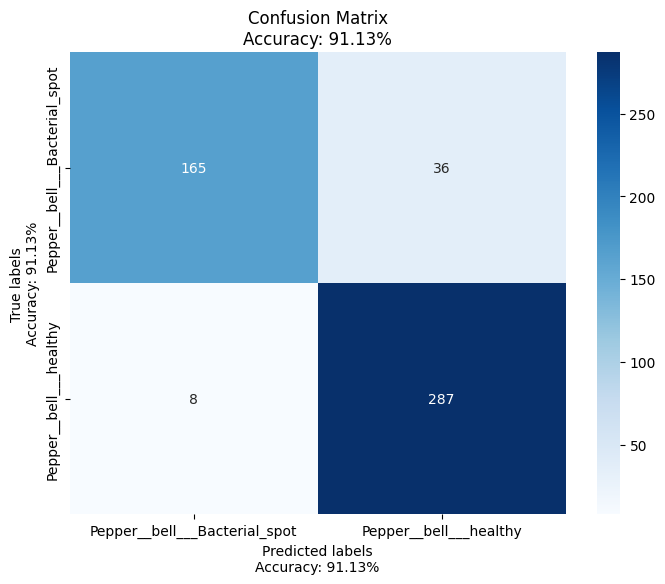

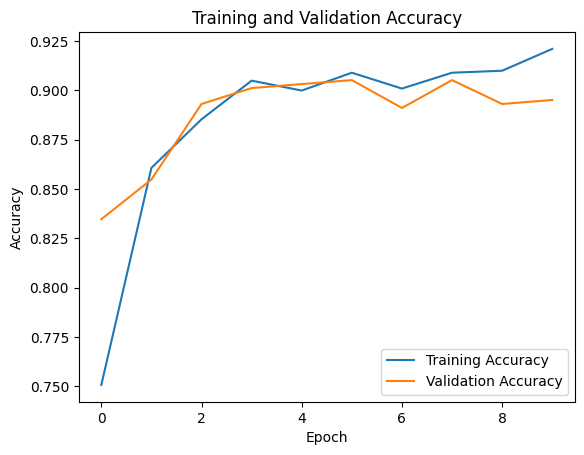

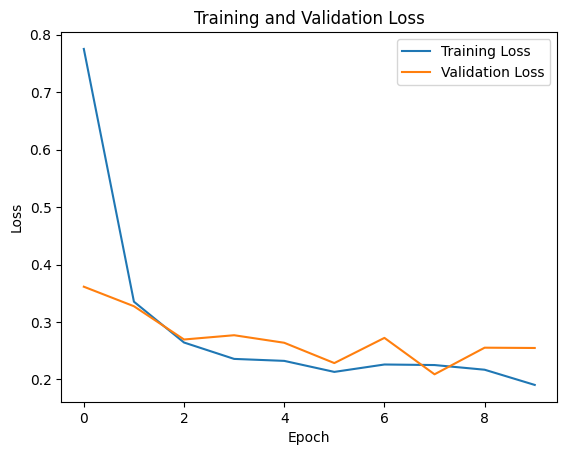

Predicted class name: Pepper__bell___Bacterial_spot


In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import ResNet50

# Define classes
classes = ["Pepper__bell___Bacterial_spot", "Pepper__bell___healthy"]


# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Pepper"


# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),  # Resizing images to 32x32 to match the input shape of ResNet50
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)

# Load the ResNet50 model without the top classification layer and with pretrained weights on ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False


# Define your custom classification layers without dropout
x = layers.Flatten()(resnet.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes


# Create the model
resnet_model = models.Model(resnet.input, output)


# Compile the model with Adam optimizer and sparse categorical crossentropy loss
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = resnet_model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_accuracy = resnet_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Get the predicted classes for the test data
y_pred = np.argmax(resnet_model.predict(test_generator), axis=1)

# Get true labels
y_true = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)